## Instructions

1. Read chapter 2 from Haykin’s book until 2.13 (leaving out Statistical learning theory to end of chapter) and summarize or sketch your insights in mind-map or an outline or a summary. [4 points]

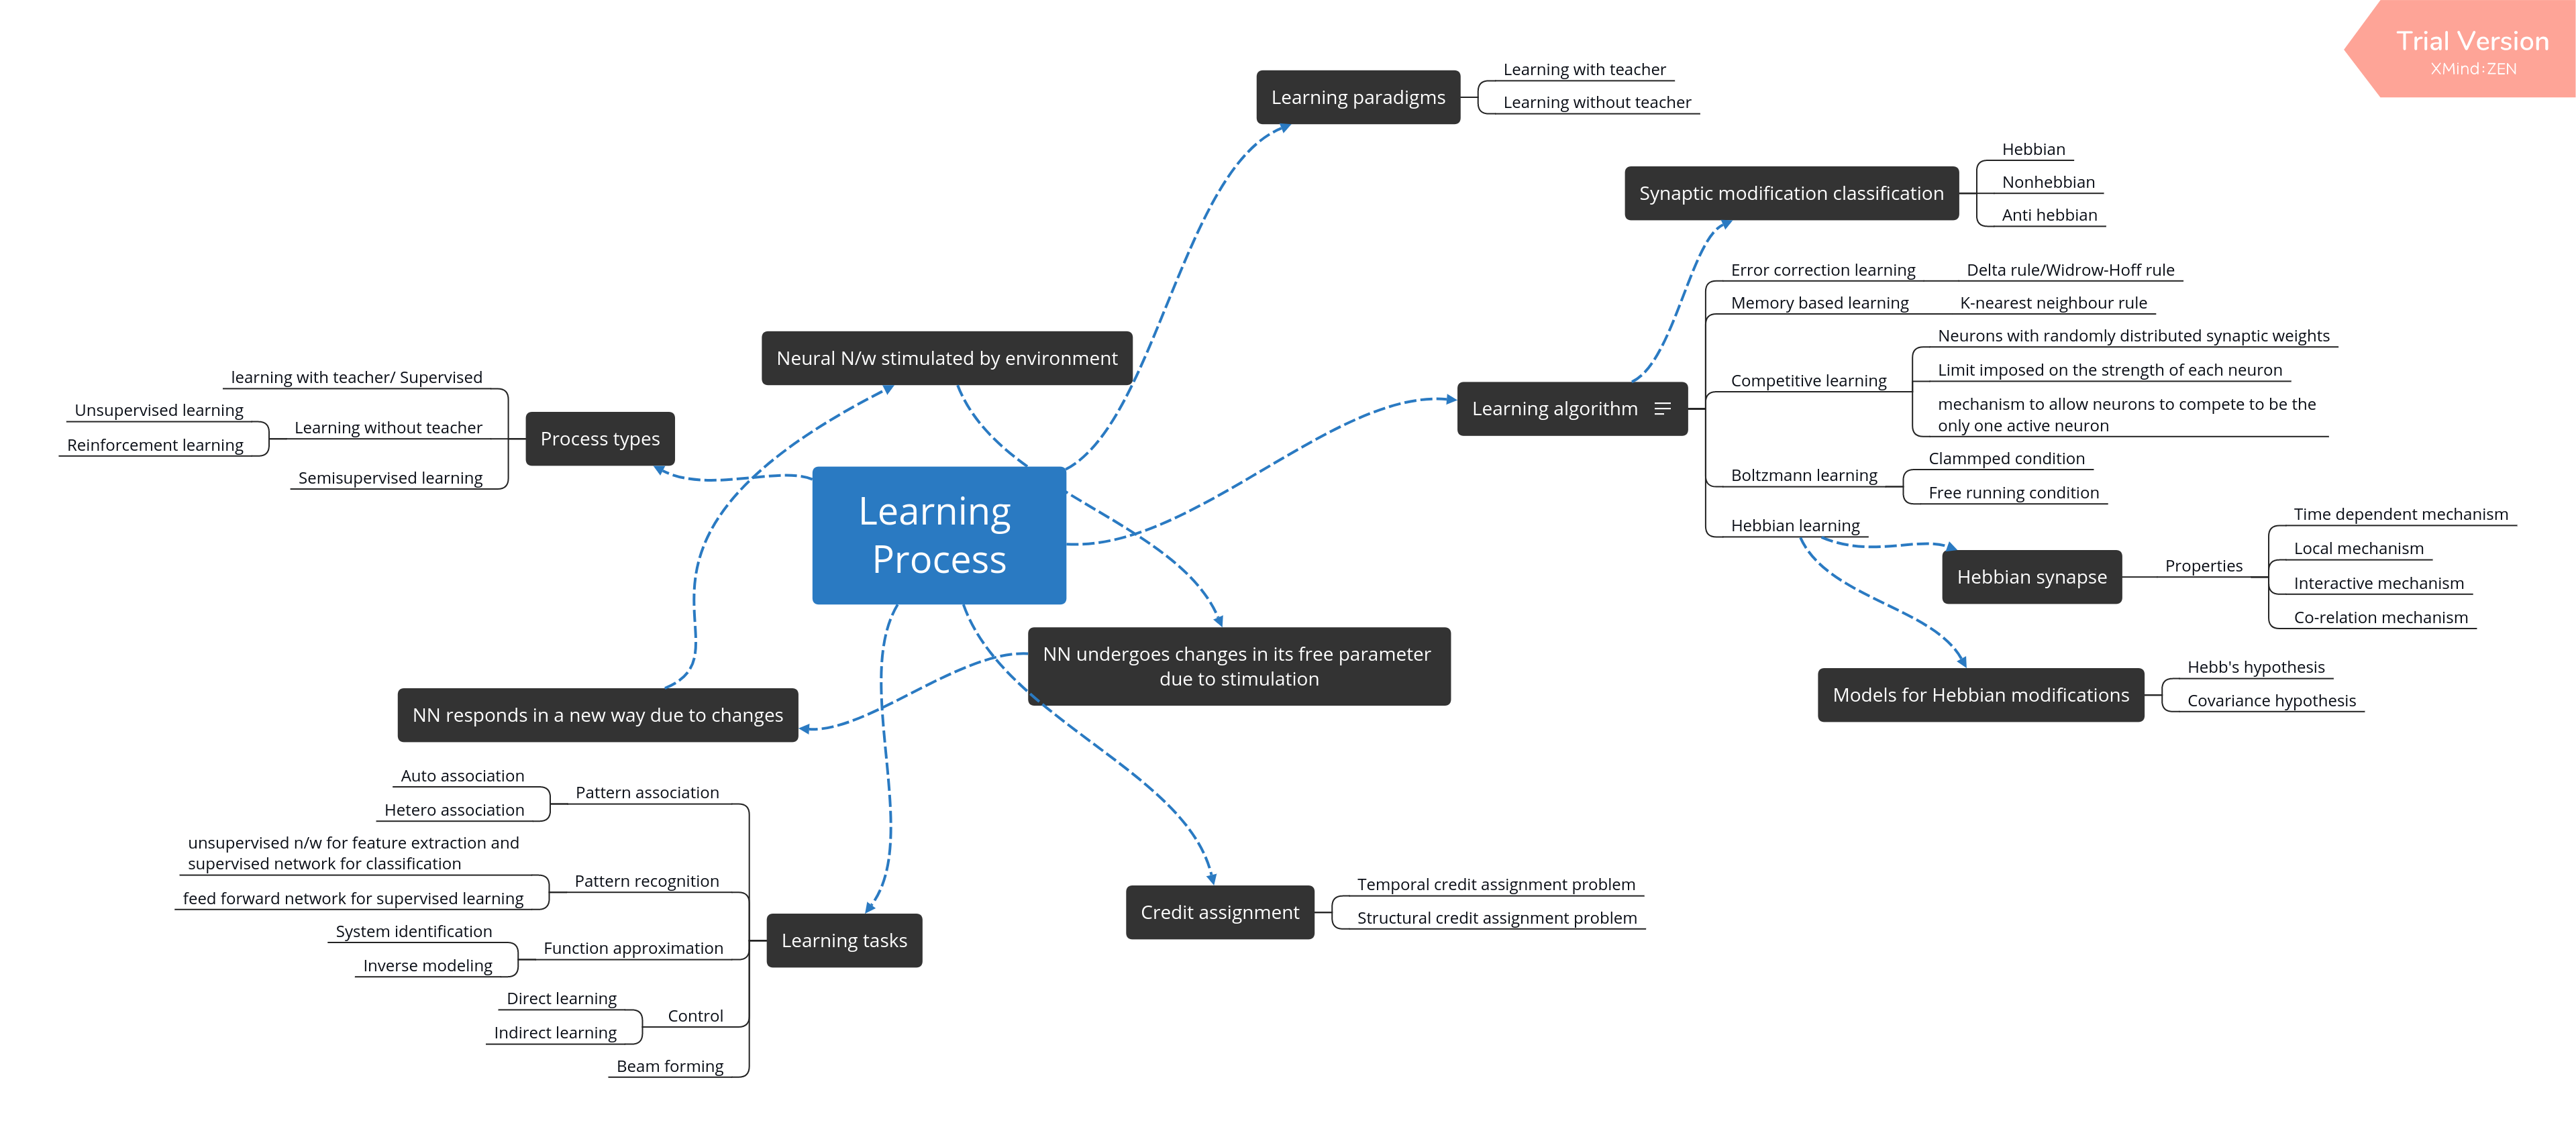

 2. Write down 3 questions and their brief answers on the reading material. [2 Points]

$\textbf{Question 1:}$ what is the limitation of Hebb's hypothesis? How does covariance hypothesis overcomes it?

$Answer:$ As per Hebb's hypothesis, with repeated application of input signal /presynaptic activity leads to an increase in output signal/ post synaptic activity which is exponential in growth. This finally drives the synaptic connection into saturation, leading to selectivity being lost and no further information would be stored in synapse. <br>
In Covariance hypothesis, presynaptic and postsynaptic input signals are replaced by the departure of presynaptic and postsynaptic signals from their respective average values over a certain time interval. <br>

$\textbf{Question 2:}$ what is the major difference between competitive learning and Hebbian learning? which feature makes competitve learning highly suited to discover statistically salient features used to classify set of input patterns? 

$Answer:$ In competitive learning, the output neurons compete among themselves to become active while the neurnal network based on Hebbian learning have several neurons active simultaneously. <br>
Since in competitive learning, only one neuron is active at a time, it makes it highly suitable to discover statistically salient features that would be used to classify set of i/p patterns.<br>

$\textbf{Question:}$ Name the two subproblems of credit assignment problems? 

$Answer:$ 1.Temporal credit assignment problem - involves the instants of time when the actions that actually deserve credit were taken.<br>2. Structural credit assignment problem - involves assigning credits to the internal structure of actions generated by the system.

3. Do the problem 1.13 (Network architecture) from the previous week’s assignment again by visualising the output of the neuron using 3d view. Assume the network presented in fig P1.13 is a binary-classifier, please depict how the input space (R2) is classified on a 3D graph using different colors. [8 points] 

<IPython.core.display.Javascript object>


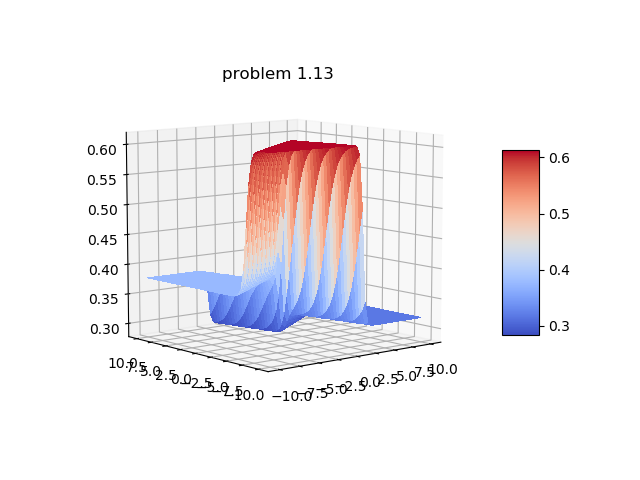

<IPython.core.display.Javascript object>


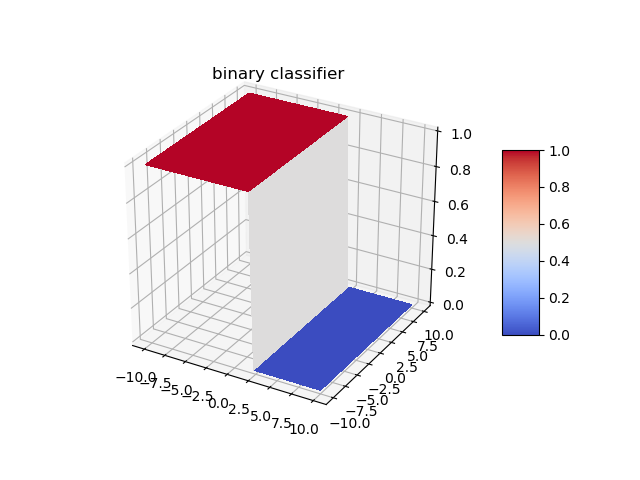

In [3]:
%matplotlib notebook
import numpy as np
import sympy as sp
import pylab
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter


def sigmoid(x):
#     sigmoid_x = 1 / (1+np.exp(-x))
    return np.array(1 / (1+np.exp(-x)))

X1 = np.linspace(-10, 10)
X2 = np.linspace(-10, 10)
X1, X2 = np.meshgrid(X1, X2)
Y = []

Y = sigmoid(-2*sigmoid(3*sigmoid(5*X1 + X2) - sigmoid(2*X1 - 3*X2)) \
                + sigmoid(4*sigmoid(5*X1 + X2) + 6*sigmoid(2*X1 - 3*X2)))

# Y = np.array(Y)
output =[]
for i in range(len(Y)):
    if Y[0][i] >= 0.4:
#         np.append(output, 1)
        output.append(1)
    else:
#         np.append(output, 0)
        output.append(0)
output = np.array([output])

fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title('problem 1.13')
surf = ax.plot_surface(X1, X2, Y, cmap=cm.coolwarm,linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)

fig = plt.figure()
ax = fig.gca(projection='3d')
plt.title('binary classifier')
surf = ax.plot_surface(X1, X2, output, cmap=cm.coolwarm,linewidth=0, antialiased=False)

# ax.set_zlim(-0.5, 0.5)
# ax.zaxis.set_major_locator(LinearLocator(2))
# ax.zaxis.set_major_formatter(FormatStrFormatter('%.0002f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

4. Adjust the data at the "New Classification Example (now *with* bias)" slide, such that a bais becomes necessary (not 0). Validate the perceptron learning algorithm. [8 points]

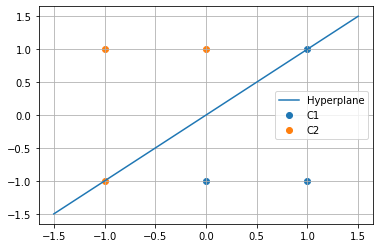

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pylab

c1 = np.array([(1,1),(1,-1),(0,-1)])
c2 = np.array([(-1,-1),(-1,1),(0,1)])

learning_rate = 1
weight = np.array([1,0,0])
n_epoch = 6

c1_dash, c2_dash = [], []
for i in range(len(c1)):
    c1_1 = np.insert(c1[i], 0, 1)
    c2_1 = np.insert(c2[i], 0, 1)
    c1_dash.append(c1_1)
    c2_dash.append(c2_1)
    
c1_dash = np.asarray(c1_dash)
c2_dash = np.asarray(c2_dash)

C = np.concatenate((c1_dash, np.dot(-1, c2_dash)))

for epoch in range(n_epoch):
    for i in range(len(C)):
        if (np.dot(weight, C[i])) <= 0:
            w_new = weight + learning_rate * C[i]
            weight = w_new
        else:
            w_new = weight


x1, y1 = zip(*c1)
x2, y2 = zip(*c2)
X = np.linspace(-1.5, 1.5)
Y = np.linspace(-1.5, 1.5)
H = w_new[0] + w_new[1] * X + w_new[2] * Y


plt.plot(X, H, label='Hyperplane')
plt.scatter(x1, y1, label='C1')
plt.scatter(x2, y2, label='C2')
plt.grid()
plt.legend()
plt.show()

5. Program the perceptron learning algorithm as binary classifier in Python. Define two functions: learn_pecptron and evaluate_perceptron. The learn_pecptron function are learning rate, positive and negative data.[8 points]

[1.  0.2]


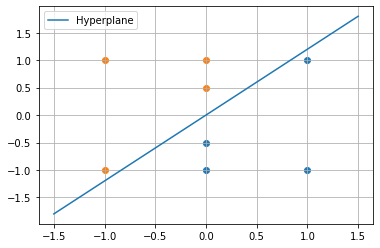

In [4]:
def learn_perceptron(C, learn_rate, weight):
    desired_output = []
    y = 0
    for i in range(len(C)):
        y_out = y + np.dot(weight,C[i])
        y = y_out
        if y_out >= 0:
            desired_output.append(1)
        else:
            desired_output.append(0)
        
    return desired_output

def evaluate_perceptron(C, learn_rate, weight):
    evaluate_output = []
    y = 0
    for i in range(len(C)):
#         print(i)
        y_out = y + np.dot(weight,C[i])
        y = y_out
        if y_out >= 0:
            evaluate_output.append(1)
        else:
            evaluate_output.append(0)
        
    return evaluate_output

def weight_adjustments(C, DO, EF, initial_weight, learn_rate, i):
    for i in range(len(C)):
        error = DO[i] - EF[i]
        if error >= 0:
            adj_weight = initial_weight + np.dot(C[i], error)
        elif DO[0] == EF[0]:
            adj_weight = initial_weight
        else:
            adj_weight = initial_weight - np.dot(C[i], error)
        
    return adj_weight


c1 = np.array([(1,1),(1,-1),(0,-1),(0,-0.5)])
c2 = np.array([(-1,-1),(-1,1),(0,1),(0,0.5)])
input_data = np.concatenate((c1, c2))
initial_weight = np.array([1, -0.8])
actual_weight = np.array([2, -1])
learn_rate = 0.1
n_epoch = 100

X = np.linspace(-1.5, 1.5)
Y = np.linspace(-1.5, 1.5)


for epoch in range(n_epoch):
    for i in range(len(input_data)):
        DO = learn_perceptron(input_data,learn_rate, actual_weight)
        EF = evaluate_perceptron(input_data,learn_rate, initial_weight)
        adj_weight = weight_adjustments(input_data, DO, EF,initial_weight, learn_rate, i)
        initial_weight = adj_weight
print(adj_weight)
x1, y1 = zip(*c1)
x2, y2 = zip(*c2)
H = adj_weight[0] * X + adj_weight[1] * Y


plt.plot(X, H, label="Hyperplane")
plt.scatter(x1, y1)
plt.scatter(x2, y2)
plt.grid()
plt.legend()
plt.show()

## Authors:

Shravanthi Arvind Patil <br>
Sreenivasa Hikkal Venugopala